In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import dateutil.parser
import matplotlib
import math
from matplotlib import pyplot as plt
from collections import defaultdict
matplotlib.rcParams['pdf.fonttype'] = 42
pd.set_option('styler.latex.hrules', True)
pd.set_option('styler.format.precision', 2) 

# To save : plt.gcf().savefig('../paper-jsripper/script_count_per_domain.pdf', bbox_inches='tight')

# df.style.hide(axis='index').to_latex(
#    '../paper-jsripper/sample_bundles_bundle_only.tex',
#    position='t',
#    environment='table*',
#    column_format='ll',
#    label='tab:sample_bundles_bundle_only',
#    caption='Examples of scripts containing tracking functions, these scripts are not part of filter lists',
#)

def round_to_nearest(x : int, nearest_val : int):
    return round(nearest_val * round(x/nearest_val),1)

In [2]:
vmsched_data = pd.read_csv('schedstat-60000.csv')

In [4]:
vmsched_data.head()

,timestamp,vmname,id,delta_ms,yld_cnt,legacy,sched_cnt,sched_goidle,ttwu_cnt,ttwu_local,sched_run,sched_delay,sched_slice
0,1677865128,vm1,cpu0,5005,0,0,0,0,0,0,96090241,978637,1069
1,1677865128,vm1,cpu1,5005,0,0,0,0,0,0,269703447,2828426,1374
2,1677865128,vm1,cpu2,5005,0,0,0,0,0,0,498726671,3721673,997
3,1677865128,vm1,cpu3,5005,0,0,0,0,0,0,203186722,1340198,861
4,1677865128,vm1,cpu4,5005,0,0,0,0,0,0,413709314,2952818,901


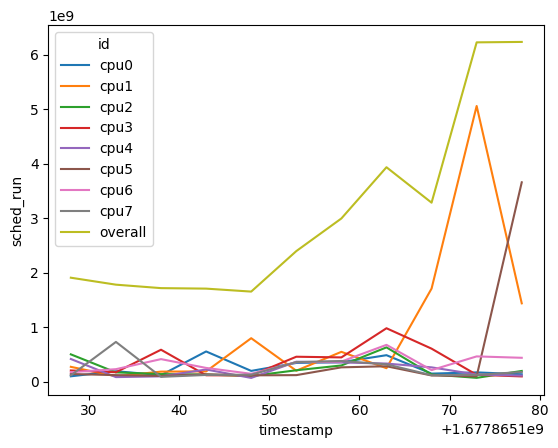

In [5]:
g = sns.lineplot(data=vmsched_data, x="timestamp", y="sched_run", hue='id')